In [ ]:
# Implementation of Bag of words with python sklearn

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
allsentences = ['This past is very tasty and affordable.','This pasta is not tasty and is affordable.','This pasta is very very delicious.']
# create object for countvectorizer
countvectorizer = CountVectorizer()
X = countvectorizer.fit_transform(allsentences)
result = X.toarray()
print(f'Result of Bag of words\n {result}')

Result of Bag of words
 [[1 1 0 1 0 1 0 1 1 1]
 [1 1 0 2 1 0 1 1 1 0]
 [0 0 1 1 0 0 1 0 1 2]]


In [2]:
# Implementation of TF-IDF by using Sklearn

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
allsentences = ['This past is very tasty and affordable.','This pasta is not tasty and is affordable.','This pasta is very very delicious.']
# object creation
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(allsentences)
feature_names = vectorizer.get_feature_names_out()
print(f'Feature names\n{feature_names}')
matrix = vectors.todense()
denselist = matrix.tolist()
# convert list to dataframe
df = pd.DataFrame(denselist, columns=feature_names)
print(f'Final Result of Tf-Idf\n {df}')

Feature names
['affordable' 'and' 'delicious' 'is' 'not' 'past' 'pasta' 'tasty' 'this'
 'very']
Final Result of Tf-Idf
    affordable       and  delicious        is       not      past     pasta  \
0    0.379729  0.379729   0.000000  0.294894  0.000000  0.499298  0.000000   
1    0.338171  0.338171   0.000000  0.525239  0.444654  0.000000  0.338171   
2    0.000000  0.000000   0.466778  0.275686  0.000000  0.000000  0.354996   

      tasty      this      very  
0  0.379729  0.294894  0.379729  
1  0.338171  0.262620  0.000000  
2  0.000000  0.275686  0.709993  


In [9]:
# Word2vec implementation

In [10]:
pip install --upgrade gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/24.0 MB 2.0 MB/s eta 0:00:13
    --------------------------------------- 0.3/24.0 MB 2.2 MB/s eta 0:00:11
    --------------------------------------- 0.5/24.0 MB 2.5 MB/s eta 0:00:10
   - -------------------------------------- 0.6/24.0 MB 2.7 MB/s eta 0:00:09
   - -------------------------------------- 0.8/24.0 MB 2.9 MB/s eta 0:00:08
   - -------------------------------------- 1.0/24.0 MB 2.9 MB/s eta 0:00:08
   - -------------------------------------- 1.1/24.0 MB 3.0 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/24.0 MB 3.0 MB/s eta 0:00:08
   -- ------------------------------------- 1.4/24.0 MB 2.9 MB/s eta 0:00:08
   -- ------------------------------------- 1.4/24.0 MB 2.8 MB/s eta 0:00:08
   -- ------------------------------------- 1.5/24.0 MB 2.7 MB/s eta 0:00:09
   -- -------

In [1]:
pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [37]:
import nltk 
import re
nltk.download('punkt')
# tokenize text of file into sentences
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# For Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhimb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
with open('example_text.txt', 'r', encoding='utf-8') as txt:
    sentences = txt.readlines()

print(f'Number of sentences {len(sentences)}')

print(f'First sentences from text file\n {sentences[0]}')

Number of sentences 8
First sentences from text file
 Random forest algorithm is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees.



In [45]:
print(f'First sentence before removing punctuations\n {sentences[0]}')
# Removing punctuations
for index in range(len(sentences)):
    sentences[index] = re.sub('[^a-zA-Z]',' ', str(sentences[index]))

print(f'First sentence after removing punctuations \n {sentences[0]}')

First sentence before removing punctuations
 Random forest algorithm is a supervised classification algorithm. As the name suggest, this algorithm creates the forest with a number of trees.

First sentence after removing punctuations 
 Random forest algorithm is a supervised classification algorithm  As the name suggest  this algorithm creates the forest with a number of trees  


In [5]:
# Now we have to apply tokenization to all sentences.

In [46]:
# tokenize text of file into sentences
word_tokenizer = []
for sent in sentences:
    word_tokens = word_tokenize(sent)
    word_tokenizer.append(word_tokens)

print(f'First sentence after tokenize \n {word_tokenizer[0]}')

First sentence after tokenize 
 ['Random', 'forest', 'algorithm', 'is', 'a', 'supervised', 'classification', 'algorithm', 'As', 'the', 'name', 'suggest', 'this', 'algorithm', 'creates', 'the', 'forest', 'with', 'a', 'number', 'of', 'trees']


In [7]:
# Building word2vec with CBOW method

In [47]:
# Predict center word using context words within window size
# Import word2vec class from gensim
from gensim.models import Word2Vec
# Apply word2vec to sentences
model_cbow = Word2Vec(sentences=word_tokenizer,
                      vector_size=2, # number of dimensions default 100
                      window=2, # window size default 5
                      min_count=2, # minimum count of words to be consider default 5
                      workers=1, # workers default 3
                      sg=0 # method 0 for CBOW and 1 for skip gram
                     )

# total vocabulary words for word 2 vec model
words_cbow = list(model_cbow.wv.key_to_index)
print(f'Total number of words{len(words_cbow)}')
# we can get word embedding value for a particular word
model_cbow.wv.__getitem__('forest')

Total number of words36


array([-0.02753039,  0.01169586], dtype=float32)

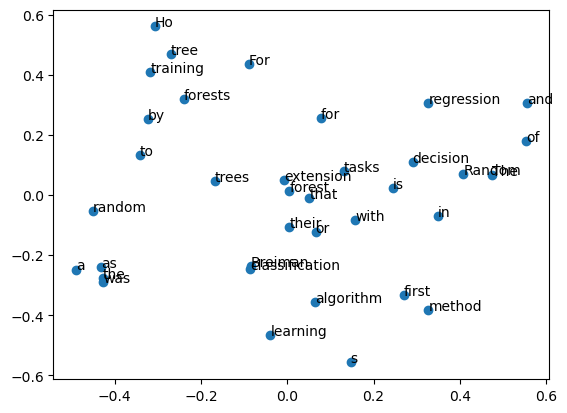

In [48]:
X = model_cbow.wv.__getitem__(model_cbow.wv.key_to_index)
# create 2D model using PCA
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

# visualize pca model using matplotlib
plt.scatter(result[:,0], result[:,1])
words_cbow = list(model_cbow.wv.key_to_index)
for i, word in enumerate(words_cbow[:100]):
    plt.annotate(text=word, xy=(result[i,0], result[i,1]))
plt.show()

In [27]:
# Building word2vec skip-gram method

In [49]:
from gensim.models import Word2Vec
# Apply word2vec to sentences
model_skip = Word2Vec(sentences=word_tokenizer,
                      vector_size=2, # number of dimensions default 100
                      window=2, # window size default 5
                      min_count=4, # minimum count of words to be consider default 5
                      workers=1, # workers default 3
                      sg=1 # method 0 for CBOW and 1 for skip gram
                     )

# total vocabulary words for word 2 vec model
words = list(model_skip.wv.key_to_index)
print(f'Total number of words{len(words)}')
# we can get word embedding value for a particular word
wordembedding = model_skip.wv.__getitem__('forest')
print(wordembedding)

Total number of words16
[-0.46490774 -0.35530683]


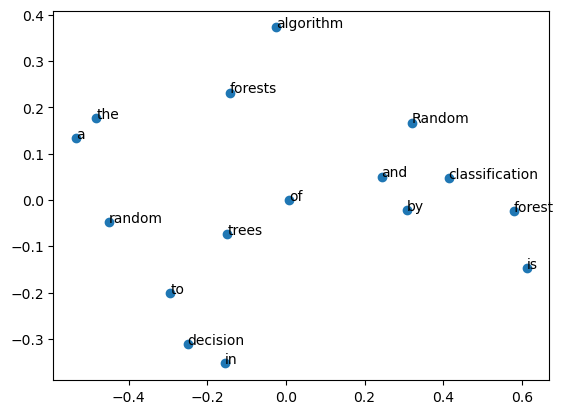

In [50]:
X = model_skip.wv.__getitem__(model_skip.wv.key_to_index)
# create 2D model using PCA
pca_model = PCA(n_components=2)
result = pca_model.fit_transform(X)

# visualize pca model using matplotlib
plt.scatter(result[:,0], result[:,1])
words_skip = list(model_skip.wv.key_to_index)
for i, word in enumerate(words_skip[:100]):
    plt.annotate(text=word, xy=(result[i,0], result[i,1]))
plt.show()